In [1]:
using StatsPlots
using Plots
using DataFrames
using CSV
using Statistics

In [3]:
function multiple_boxplot(;df, group_var, var_one, var_two, var_three, title_plot)
    max_y = maximum(
        (maximum(df[!, var_one]),
        maximum(df[!, var_two]),
        maximum(df[!, var_three]))
    )
    min_y = minimum(
        (minimum(df[!, var_one]),
        minimum(df[!, var_two]),
        minimum(df[!, var_three]))
    )
    l = @layout [grid(1, 3)]
    # plot 1
    p1 = @df df boxplot(string.(cols(group_var)), cols(var_one), group=cols(group_var), label=false)
    ylims!((min_y, max_y))
    xlabel!(string(group_var))
    title!(string(var_one))
    # plot 2
    p2 = @df df boxplot(string.(cols(group_var)), cols(var_two), group=cols(group_var), label=false)
    ylims!((min_y, max_y))
    xlabel!(string(group_var))
    title!(string(var_two))
    # plot 3
    p3 = @df df boxplot(string.(cols(group_var)), cols(var_three), group=cols(group_var), label=false)
    ylims!((min_y, max_y))
    xlabel!(string(group_var))
    title!(string(var_three))

    all_p = plot(p1, p2, p3, layout = l)
    all_p[:plot_title] = title_plot
    plot(all_p)
end;

In [4]:
df_metrics = CSV.read("./simulation_MS_with_randomisation_n500_p500_sigma2_estimated_new.csv", DataFrames.DataFrame);

# Results Analysis
Simulations based on the same structure used in the paper on Mirror Statistic.
Mainly, n=500, p=500, and proportion of non-zero coefficients 10% on n. Here I have simulated multiple scenarios with proportions of non-zero coefficients higher than 10%.
Features Covariance matrix with a random and block structure

### False Discovery Rate

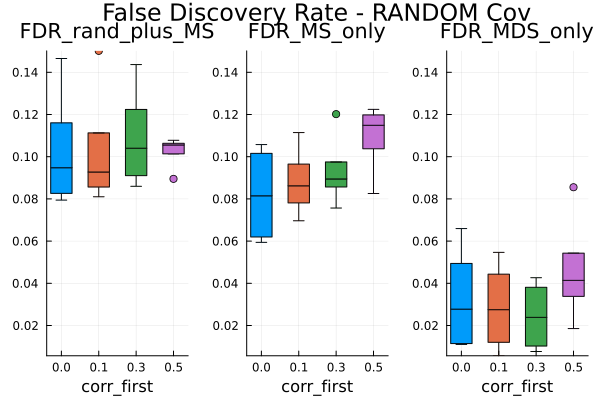

In [7]:
multiple_boxplot(df=df_metrics[df_metrics.block_diagonal .== 0, :], group_var=:corr_first,
    var_one=:FDR_rand_plus_MS, var_two=:FDR_MS_only, var_three=:FDR_MDS_only,
    title_plot="False Discovery Rate - RANDOM Cov"
)

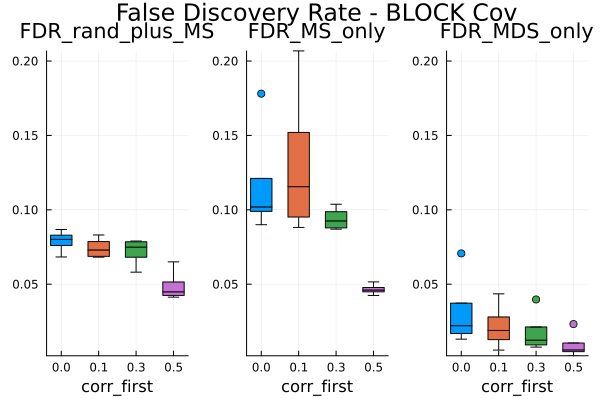

In [9]:
multiple_boxplot(df=df_metrics[df_metrics.block_diagonal .== 1, :], group_var=:corr_first,
    var_one=:FDR_rand_plus_MS, var_two=:FDR_MS_only, var_three=:FDR_MDS_only,
    title_plot="False Discovery Rate - BLOCK Cov"
)


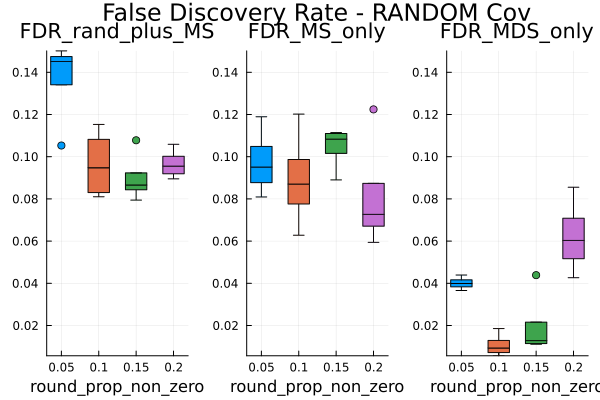

In [10]:
multiple_boxplot(df=df_metrics[df_metrics.block_diagonal .== 0, :], group_var=:round_prop_non_zero,
    var_one=:FDR_rand_plus_MS, var_two=:FDR_MS_only, var_three=:FDR_MDS_only,
    title_plot="False Discovery Rate - RANDOM Cov"
)

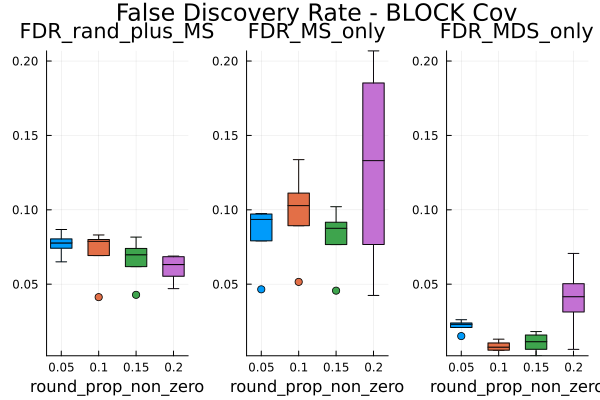

In [12]:
multiple_boxplot(df=df_metrics[df_metrics.block_diagonal .== 1, :], group_var=:round_prop_non_zero,
    var_one=:FDR_rand_plus_MS, var_two=:FDR_MS_only, var_three=:FDR_MDS_only,
    title_plot="False Discovery Rate - BLOCK Cov"
)

### True Positive Rate

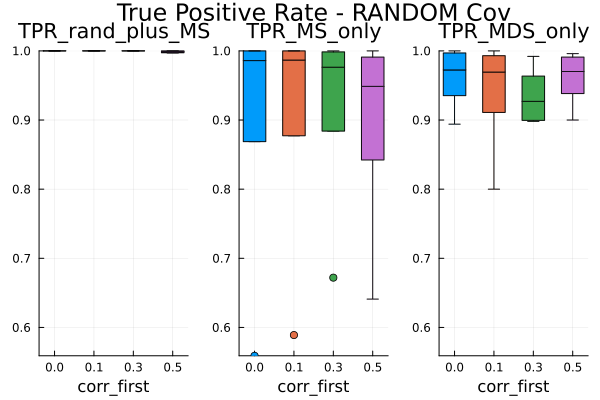

In [13]:
multiple_boxplot(df=df_metrics[df_metrics.block_diagonal .== 0, :], group_var=:corr_first,
    var_one=:TPR_rand_plus_MS, var_two=:TPR_MS_only, var_three=:TPR_MDS_only,
    title_plot="True Positive Rate - RANDOM Cov"
)

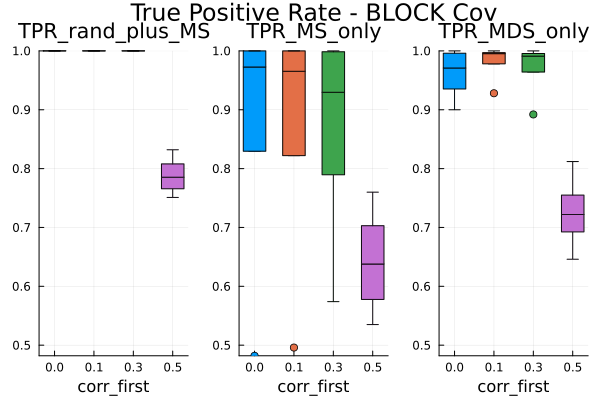

In [14]:
multiple_boxplot(df=df_metrics[df_metrics.block_diagonal .== 1, :], group_var=:corr_first,
    var_one=:TPR_rand_plus_MS, var_two=:TPR_MS_only, var_three=:TPR_MDS_only,
    title_plot="True Positive Rate - BLOCK Cov"
)

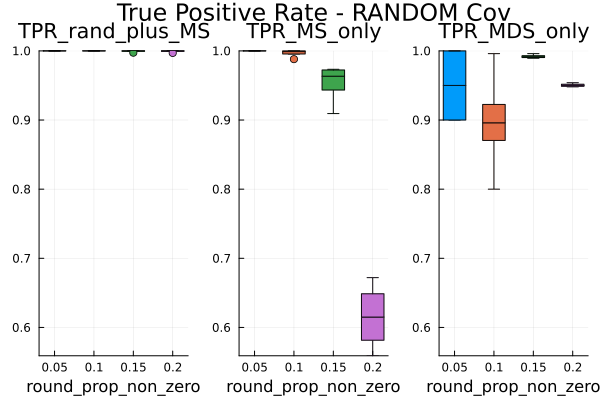

In [15]:
multiple_boxplot(df=df_metrics[df_metrics.block_diagonal .== 0, :], group_var=:round_prop_non_zero,
    var_one=:TPR_rand_plus_MS, var_two=:TPR_MS_only, var_three=:TPR_MDS_only,
    title_plot="True Positive Rate - RANDOM Cov"
)

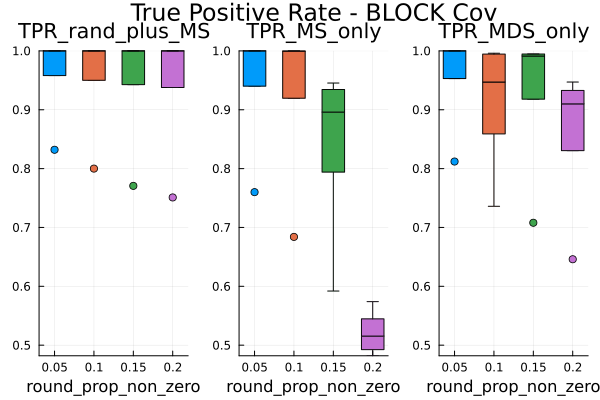

In [16]:
multiple_boxplot(df=df_metrics[df_metrics.block_diagonal .== 1, :], group_var=:round_prop_non_zero,
    var_one=:TPR_rand_plus_MS, var_two=:TPR_MS_only, var_three=:TPR_MDS_only,
    title_plot="True Positive Rate - BLOCK Cov"
)

### Power

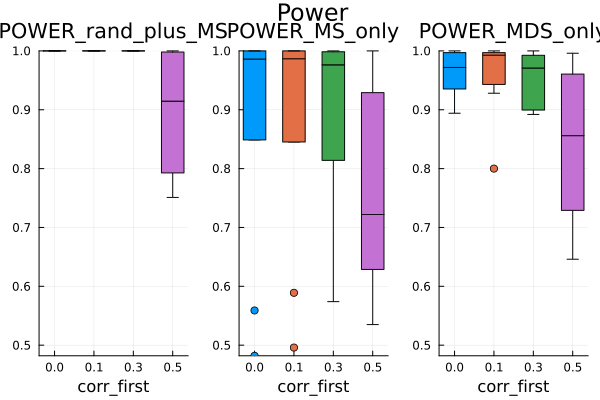

In [18]:
multiple_boxplot(df=df_metrics, group_var=:corr_first,
    var_one=:POWER_rand_plus_MS, var_two=:POWER_MS_only, var_three=:POWER_MDS_only,
    title_plot="Power"
)

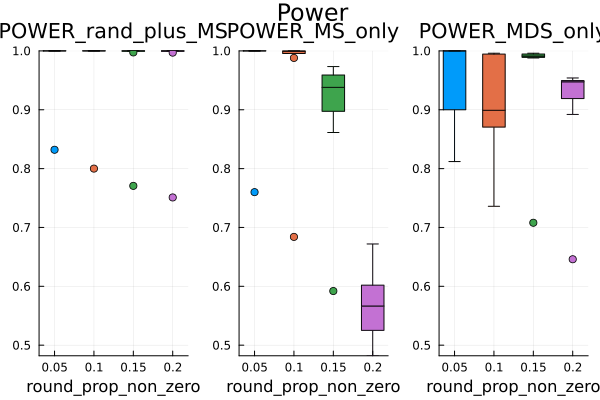

In [19]:
multiple_boxplot(df=df_metrics, group_var=:round_prop_non_zero,
    var_one=:POWER_rand_plus_MS, var_two=:POWER_MS_only, var_three=:POWER_MDS_only,
    title_plot="Power"
)

All together with Randomisation only

In [20]:
println("Average TPR Rand+MS: $(round(mean(df_metrics.TPR_rand_plus_MS), digits=3)), std: $(round(std(df_metrics.TPR_rand_plus_MS), digits=3))")
println("Average TPR MS Only: $(round(mean(df_metrics.TPR_MS_only), digits=3)), std: $(round(std(df_metrics.TPR_MS_only), digits=3))")
println("Average TPR Multiple MS Only: $(round(mean(df_metrics.TPR_MDS_only), digits=3)), std: $(round(std(df_metrics.TPR_MDS_only), digits=3))")
println("Average TPR Rand Only: $(round(mean(df_metrics.TPR_rand_only), digits=3)), std: $(round(std(df_metrics.TPR_rand_only), digits=3))")

Average TPR Rand+MS: 0.973, std: 0.072
Average TPR MS Only: 0.847, std: 0.192
Average TPR Multiple MS Only: 0.928, std: 0.094
Average TPR Rand Only: 0.961, std: 0.106


In [22]:
println("Average FDR Rand+MS: $(round(mean(df_metrics.FDR_rand_plus_MS), digits=3)), std: $(round(std(df_metrics.FDR_rand_plus_MS), digits=3))")
println("Average FDR MS Only: $(round(mean(df_metrics.FDR_MS_only), digits=3)), std: $(round(std(df_metrics.FDR_MS_only), digits=3))")
println("Average FDR Multiple MS Only: $(round(mean(df_metrics.FDR_MDS_only), digits=3)), std: $(round(std(df_metrics.FDR_MDS_only), digits=3))")
println("Average FDR Rand Only: $(round(mean(df_metrics.FDR_rand_only), digits=3)), std: $(round(std(df_metrics.FDR_rand_only), digits=3))")

Average FDR Rand+MS: 0.087, std: 0.027
Average FDR MS Only: 0.095, std: 0.035
Average FDR Multiple MS Only: 0.027, std: 0.022
Average FDR Rand Only: 0.105, std: 0.023


In [23]:
println("Average Power Rand+MS: $(round(mean(df_metrics.POWER_rand_plus_MS), digits=3)), std: $(round(std(df_metrics.POWER_rand_plus_MS), digits=3))")
println("Average Power MS Only: $(round(mean(df_metrics.POWER_MS_only), digits=3)), std: $(round(std(df_metrics.POWER_MS_only), digits=3))")
println("Average Power Multiple MS Only: $(round(mean(df_metrics.POWER_MDS_only), digits=3)), std: $(round(std(df_metrics.POWER_MDS_only), digits=3))")
println("Average Power Rand Only: $(round(mean(df_metrics.POWER_rand_only), digits=3)), std: $(round(std(df_metrics.POWER_rand_only), digits=3))")

Average Power Rand+MS: 0.973, std: 0.072
Average Power MS Only: 0.847, std: 0.192
Average Power Multiple MS Only: 0.928, std: 0.094
Average Power Rand Only: 0.961, std: 0.106


# Summary
Performance comparison of using **Mirror Statistic with Randomisation** (Rand+MS) versus using **standard Mirror Statistic** (MS only), which refers to Mirror Statistic used with a simple Data Splitting mechanism. The metrics tracked here are False Discovery Rate (FDR) and True Positive Rate (TPR, aka Sensitivity, Recall, Hit Rate).  
In addition **Randomisation only** (Rand only) is included in the comparison. *However*, using only Randomisation does not allow for a direct adjustment and control of FDR (or maybe we could adjust the p-values assuming those of the excluded variables are 1...?), therefore empirical FDR is calculated on rejections based on p-values below the 5% threshold.  
Simulations have been done following the same strategy adopted in the paper *False Discovery Rate Control via Data Splitting*. Standard high-dimensional linear regression with n=500 observations and p=500 covariates. 10 replications have been made for each combination of the following:
- Random and Block covariance structure. The block structure implies that the 0-coefficients all belong to one block and are uncorrelated with the non-zero coefficients (which is a required assumption for Mirror Statistic to work)
- The proportion of non-zero coefficients varied between 0.05 to 0.2
- Covarites are generted from a multivariate Normal distribution with different covariance structure
    - Identity matrix
    - Toeplitz structure, with first off-diagonal correlation coefficients ranging from 0 to 0.5

### Key takeways:
The main result from the paper, ie the control of the FDR at a specified level (0.1 here), is replicated with success. In the different highlighted scenarios, Random and Block covariance, with and without correlation, the FDR level is always concentrated around **0.1**, with some variations, depending on the intensity of the correlation and on the proportion on non-zero coefficients. In terms of our comparison: 
- FDR values are similar for both methods over all scenarios, with the only difference being that the generation of data with a Block Covariance structure seems to help more the Mirror Statistic Only method. 
- TPR seems to be higher for Rand+MS, but most importantly much less variable than MS Only, in all scenarios. The higher the proportion of non-zero coefficients the lower is the TPR, as expected.  

Comparing this simulation with the other one made with (n=100 and p=200), we can see a huge difference in terms of results. The other simulation, even when the proportion of non-zero coefficients was only 5% of 200 (5% of 200 = 10, which is 10% of *n*) both methods could not control the FDR. However, in this second simulation, with n=500 and p=500, a proportion of non-zero coefficients of 10%, equivalent to 50 *good* coefficients (again 10% of *n*), both methods achieved the desired control of the FDR.  
The difference seems to lie in the ratio between n, p and p1, with p1 being the number of non-zero coefficients.